#**CAMERA CALIBERATION USING OPENCV** *(COMPUTER VISION)*

# **INTRODUCTION**
*   Camera calibration is the process of estimating intrinsic and/or 
extrinsic parameters. Intrinsic parameters deal with the camera's internal characteristics, such as, its focal length, skew, distortion, and image center. While, extrinsic parameters describe its position and orientation in the world.
*   Computer vision is the field of computer science that focuses on creating digital systems that can process, analyze, and make sense of visual data (images or videos) in the same way that humans do.


## **STEPS INVOLVED-**


1.   Define the coordinates in accordance with the chessboard pattern.
2.   Take multiple images of the chessboard from different viewpoints in order to cover all the coordinates precisely.
3.   Locate 2D coordinates of the chessboard.
4.   Calculate camera distortion.
5.   Undistort the image using the calculated caliberation.

### **NOTE:** The dataset reference was taken from https://github.com/YoniChechik/AI_is_Math

CREATOR- https://github.com/theshredbox



LOAD THE DATSET IMAGES 

In [ ]:
# to run in google colab
import sys

if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call("svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_07_camera_calibration/images".split())


IMPORT ALL THE EQUIRED PACKAGES

In [ ]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt

GET IMAGES FROM THE SESSION STORAGE AND DEFINE THEIR SIZE

In [ ]:
square_size = 2.88
img_mask = "./images/*.jpeg"
pattern_size = (9, 6)

figsize = (20, 20)

DEFINE THE DIMENSIONS OF THE CHESSBOARD AND-
1. Create vector to store vectors of 3D points for each chessboard image.
2. Create vector to store vectors of 2D points for each chessboard image.



In [ ]:
img_names = glob(img_mask)
num_images = len(img_names)

pattern_points = np.zeros((np.prod(pattern_size), 3), np.float32)
pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= square_size

obj_points = []
img_points = []
h, w = cv2.imread(img_names[0]).shape[:2]

1. LOAD THE IMAGES AND APPLY LOOP ON THE SET OF IMAGES
2. IF A DESIRED NUMBER OF CORNERS ARE FOUND IN THE IMAGE, REFINE THE PIXEL COORDINATES FOR THOSE IMAGES AND DISPLAY THEM ON THE CHESSBOARD

loading images ./images/4.jpeg
./images/4.jpeg... OK
loading images ./images/8.jpeg
./images/8.jpeg... OK
loading images ./images/6.jpeg
./images/6.jpeg... OK
loading images ./images/7.jpeg
./images/7.jpeg... OK
loading images ./images/11.jpeg
./images/11.jpeg... OK
loading images ./images/9.jpeg
./images/9.jpeg... OK
loading images ./images/15.jpeg
./images/15.jpeg... OK
loading images ./images/3.jpeg
./images/3.jpeg... OK
loading images ./images/14.jpeg
./images/14.jpeg... OK
loading images ./images/17.jpeg
./images/17.jpeg... OK
loading images ./images/1.jpeg
./images/1.jpeg... OK
loading images ./images/16.jpeg
./images/16.jpeg... OK
loading images ./images/13.jpeg
./images/13.jpeg... OK
loading images ./images/5.jpeg
./images/5.jpeg... OK
loading images ./images/2.jpeg
./images/2.jpeg... OK
loading images ./images/12.jpeg
./images/12.jpeg... OK
loading images ./images/10.jpeg
./images/10.jpeg... OK


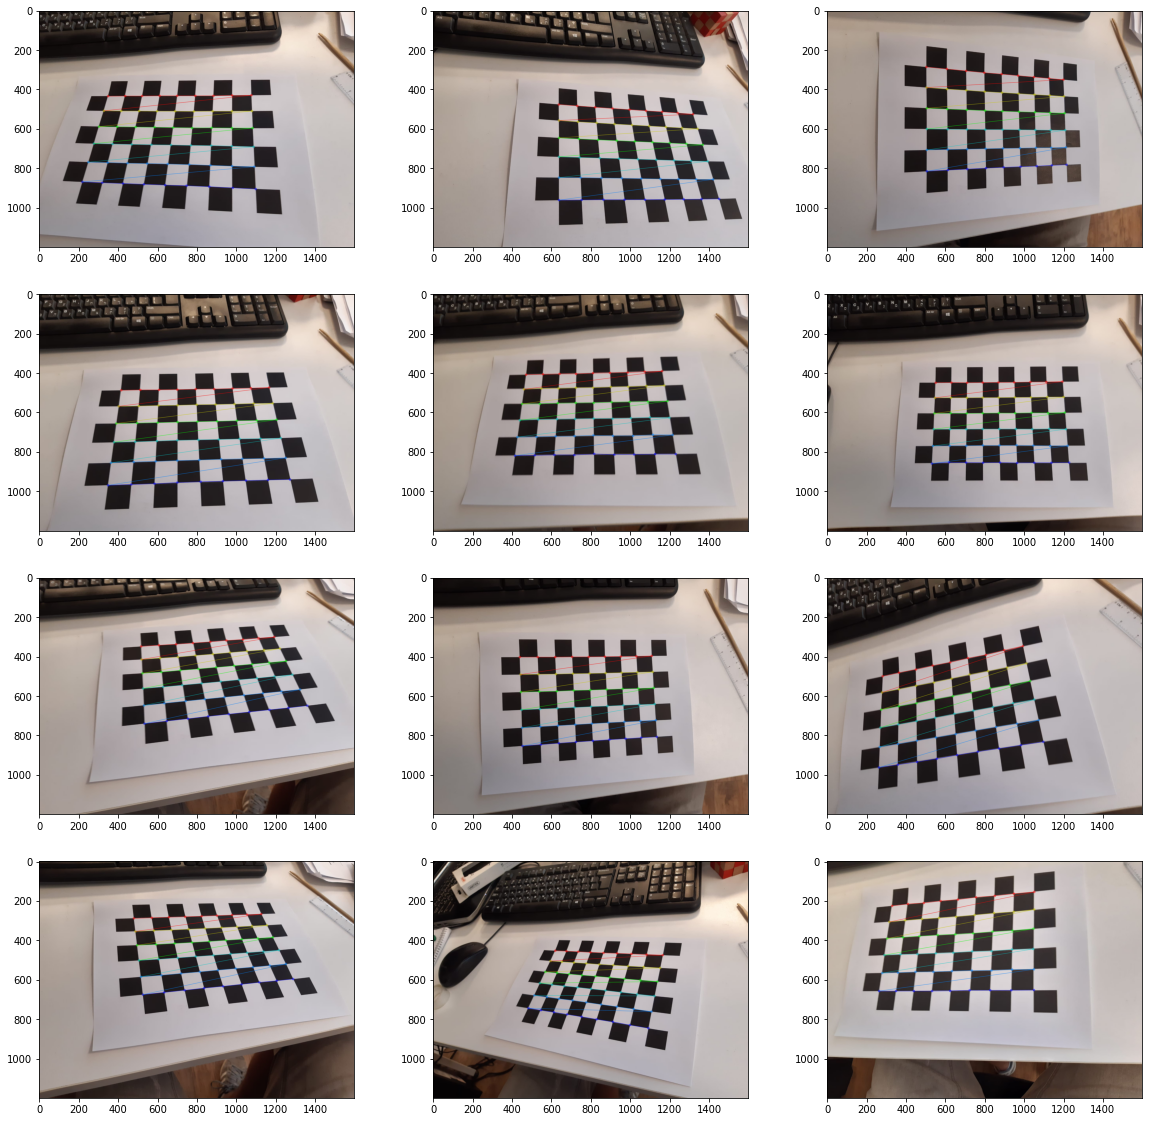

In [28]:
plt.figure(figsize=figsize)

for i, fn in enumerate(img_names):
    print("loading images %s" % fn)
    imgBGR = cv2.imread(fn)

    if imgBGR is None:
        print("Failed to load", fn)
        continue

    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)

    assert w == img.shape[1] and h == img.shape[0], f"size: {img.shape[1]} x {img.shape[0]}"
    found, corners = cv2.findChessboardCorners(img, pattern_size)


    if not found:
        print("chessboard not found")
        continue

    if i < 12:
        img_w_corners = cv2.drawChessboardCorners(imgRGB, pattern_size, corners, found)
        plt.subplot(4, 3, i + 1)
        plt.imshow(img_w_corners)

    print(f"{fn}... OK")
    img_points.append(corners.reshape(-1, 2))
    obj_points.append(pattern_points)


plt.show()


CALCULATE THE CAMERA DISTORTION 

In [29]:
rms, camera_matrix, dist_coefs, _rvecs, _tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h), None, None)

print("\nRMS:", rms)
print("camera matrix:\n", camera_matrix)
print("distortion coefficients: ", dist_coefs.ravel())


RMS: 0.9717976118290664
camera matrix:
 [[1.23559049e+03 0.00000000e+00 7.90654084e+02]
 [0.00000000e+00 1.23783748e+03 6.16444555e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distortion coefficients:  [ 2.16337110e-01 -8.82449827e-01  1.04181644e-04  1.39991929e-03
  1.09530851e+00]


UNDISTORT THE IMAGE FROM THE CALCULATED CALIBERATION

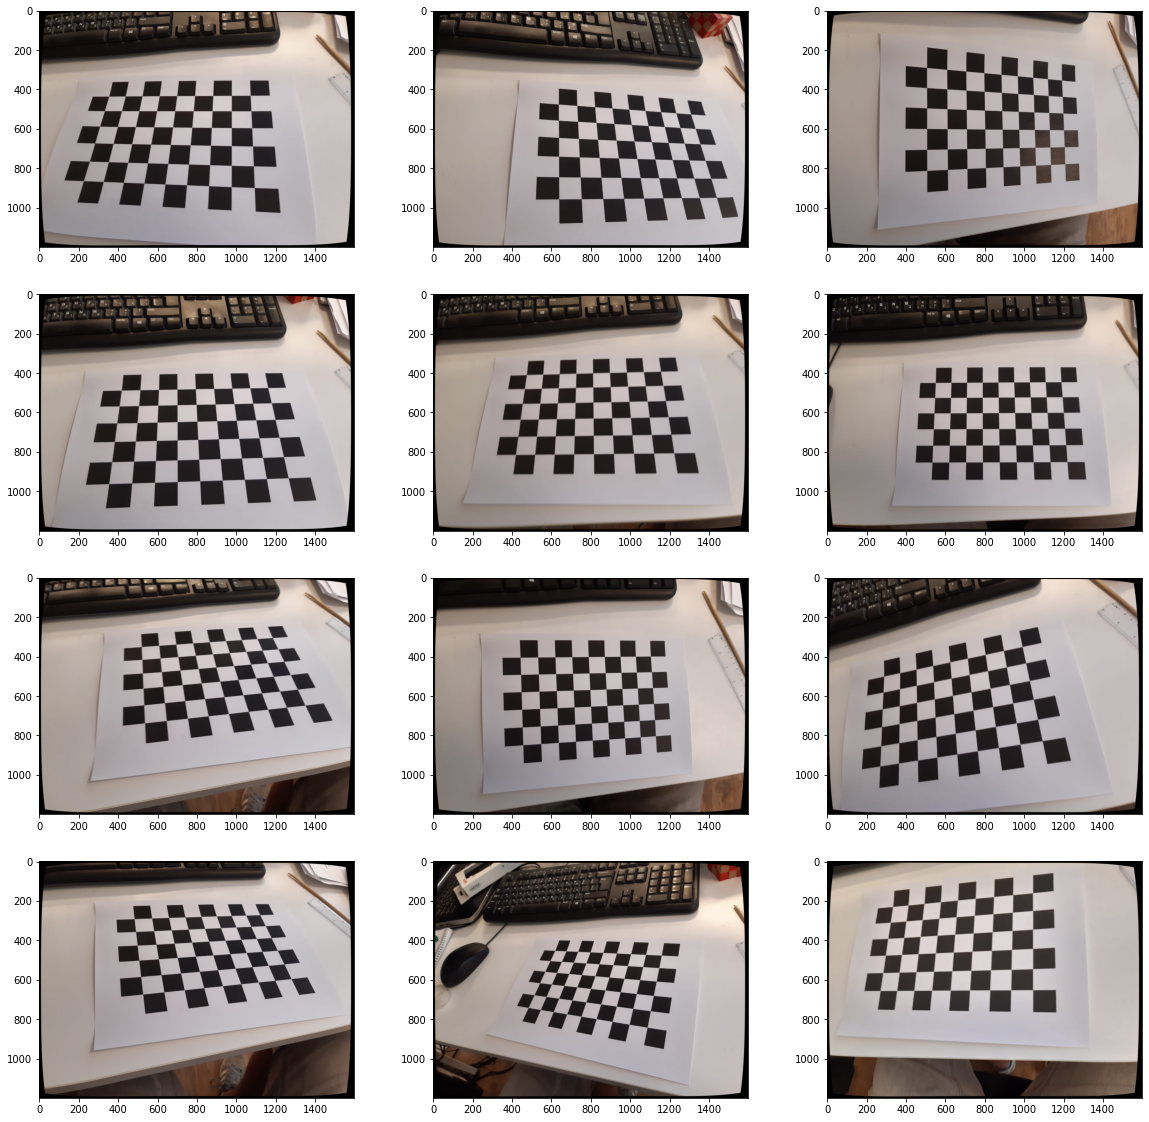

ABOVE ARE THE UNDISTORED IMAGES


In [27]:

plt.figure(figsize=figsize)
for i, fn in enumerate(img_names):

    imgBGR = cv2.imread(fn)
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

    dst = cv2.undistort(imgRGB, camera_matrix, dist_coefs)

    if i < 12:
        plt.subplot(4, 3, i + 1)
        plt.imshow(dst)

plt.show()
print("ABOVE ARE THE UNDISTORED IMAGES")